### Oppgave 1: Modellen inneholder en rekke parametere. Definer disse paramterene under:

- Lambda: $\lambda$

Lambda (𝜆): Lambda representerer fordelingen av økonomisk aktivitet mellom to regioner (ofte sentrum og periferi). I sentrum-periferi-modellen brukes denne parameteren for å måle andelen av total aktivitet som foregår i den ene regionen i forhold til den andre. Når lambda er 0, er all aktivitet i periferi, mens når lambda er 1, er all aktivitet i sentrum.

- Epsilon: $\epsilon$ 

Epsilon (𝜖): Epsilon er substitusjonselastisiteten mellom differensierte produkter. Dette parameteret er viktig for å bestemme hvor lett konsumentene kan bytte mellom ulike varianter av et produkt. En høy epsilon indikerer at produktene er gode substitutter, mens en lav epsilon viser at de er svært differensierte.

- Rho: $\rho$

Rho (𝜌): Rho er intensiteten til preferansen for de produserte godene i nyttefunksjonen (manufactured goods $M$). Når denne parameteren er lik 1 er de produserte godene perfekte substituter, mens dersom parameteren nærmer seg 0 ønsker konsumenten større variasjon i de produserte godene. Parameteren er viktig i preferanser og etterspørsel etter varer. Det påvirker hvordan konsum av produkter fordeles mellom ulike varianter, og hvordan forbrukerne reagerer på prisendringer i de differensierte varene.

- Delta: $\delta$

Delta (𝛿): Delta representerer priselastisiteten til investering i forhold til kapital. Dette kan også relateres til hvor følsom produktiviteten er for endringer i investeringsnivået. I en romlig modell kan delta påvirke forholdet mellom investeringsintensiteten i ulike regioner.

- Phi: $\phi$

Phi (𝜙): Phi er en parameter som kan beskrive hvor mye av økonomisk aktivitet som er drevet av produktivitetsforbedringer eller teknologi. Dette kan også tolkes som en mål på effektivitet eller eksternaliteter, som er viktig i sentrum-periferi-modellen der økonomisk aktivitet konsentreres.

- Gamma: $\gamma$

Gamma (𝛾): Gamma representerer andelen av økonomisk aktivitet som er knyttet til arbeidskraft. Dette kan også brukes til å modellere fordelingen av produksjon mellom ulike sektorer, slik som jordbruk og industri, hvor arbeidsintensiteten varierer.

- Betta: $\beta$

Beta (𝛽): Beta er en diskonteringsfaktor som påvirker hvordan framtidig nytte eller inntekt vurderes i forhold til nåværende nytte eller inntekt. Dette er viktig for intertemporale valg og investeringer over tid.

- T: $T$

T: T representerer transportkostnader mellom regioner, et sentralt element i romlige modeller som sentrum-periferi-modellen. Transportkostnader spiller en nøkkelrolle i å bestemme hvordan økonomisk aktivitet fordeles geografisk.

In [12]:

import numpy as np
import matplotlib.pyplot as plt


# Funksjon for å kalkulere w1/w2 raten
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Funksjon for å simulere modellen
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulering for benchmark verdier
lambda_values = np.arange(0, 1.1, 0.1)

# Definer konstanter (disse må du justere basert på hva som er spesifikt for ditt scenario)
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 5
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Skriv ut resultatene
print(benchmark_ratios)


[0.97827655 0.99317911 1.00278747 1.00686527 1.00535653 1.
 0.99467201 0.99318154 0.99722028 1.00686773 1.02220584]


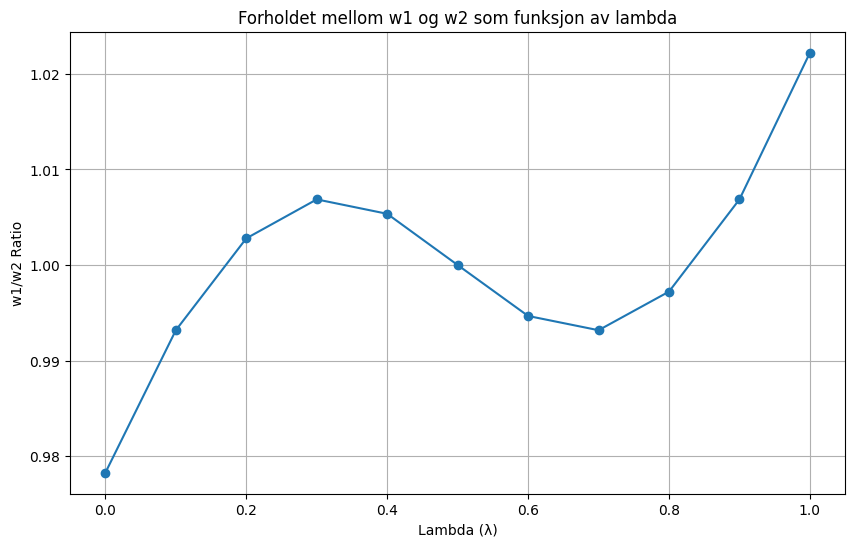

In [13]:
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Resultatene viser w1/w2-raten for ulike verdier av lambda (λ), hvor lambda representerer andelen av total befolkning eller ressurser i "sentrum".

- Når lambda er 0.0, er hele befolkningen eller ressursene i "periferien", og w1/w2-raten er lavere enn 1, som indikerer at lønningene i "sentrum" er lavere sammenlignet med "periferien".

- Ettersom lambda øker og nærmer seg 0.5, ser vi at w1/w2-raten nærmer seg 1, hvilket betyr at lønnsforskjellene mellom sentrum og periferi blir mindre.

- Ved lambda = 0.5, er ressursene jevnt fordelt mellom sentrum og periferi, og w1/w2-raten er nøyaktig 1, noe som indikerer lik lønn i begge regioner.

- Når lambda fortsetter å øke og nærmer seg 1.0, hvor nesten alle ressurser er i "sentrum", ser vi at w1/w2-raten stiger over 1. Dette viser at lønningene i "sentrum" er høyere enn i "periferien".

- Ved lambda = 1.0, hvor alle ressurser er i "sentrum", er w1/w2-raten tydelig høyere enn 1, som indikerer betydelig høyere lønninger i "sentrum" sammenlignet med "periferien".

Grafen viser hvordan lønnsforholdet varierer med endringer i befolknings- eller ressursfordelingen mellom "sentrum" og "periferi". Dette illustrerer en typisk sentrum-periferi dynamikk hvor geografisk konsentrasjon av ressurser (folk eller kapital) kan påvirke lønnsnivået betydelig.